In [160]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from anndata import AnnData
import squidpy as sq
import scanpy as sc
from sklearn.preprocessing import normalize

(-21.75, 522.75, -24.900000000000002, 522.9)

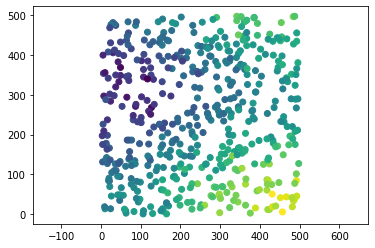

In [11]:
plt.scatter(coords[:, 0], coords[:, 1], c=values)
plt.axis('equal')

In [134]:
coords = np.random.randint(0, 50, (500, 2))

(-2.45, 51.45, -2.45, 51.45)

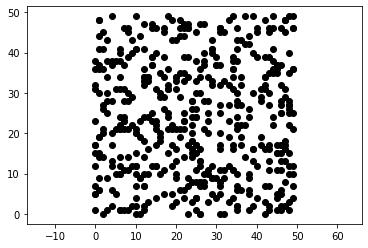

In [136]:
plt.scatter(coords[:, 0], coords[:, 1], c='k')
plt.axis('equal')

In [268]:
dists = pdist(coords, metric="sqeuclidean")

In [270]:
np.max(dists)

4802.0

In [289]:
np.random.dirichlet((0.25, 0.25, 0.25, 0.25))

array([9.99417297e-01, 1.22895318e-07, 2.24946002e-05, 5.60085828e-04])

In [285]:
def get_covariance(coords):
    

SyntaxError: unexpected EOF while parsing (970935435.py, line 2)

In [278]:
def sim_svgs(n_svgs=10, n_non_svgs=2, library_size=1e4):
    x, y = np.meshgrid(np.arange(50),np.arange(50))
    
    coords = np.column_stack((np.ndarray.flatten(x), 
                          np.ndarray.flatten(y)))
    
    counts = np.zeros((50*50, n_svgs + n_non_svgs))

    rbf1 = RBF(1)
    rbf5 = RBF(5)
    rbf10 = RBF(10)
    rbf15 = RBF(15)
    
    cov1 = rbf1(coords)
    cov2 = rbf5(coords)
    cov3 = rbf10(coords)
    cov4 = rbf15(coords)
        
    # generate SVGs
    for i in range(n_svgs):

        cov = 0.2*cov1 + 0.4*cov2 + 0.4*cov4 + 0.2*cov4
        
        counts[:, i] = scipy.stats.multivariate_normal.rvs(
            mean = np.zeros(50**2),
            cov = cov)
        
    # generate non-SVGs
    for i in range(n_non_svgs):
        counts[:, i+n_svgs] = np.random.standard_normal(50**2)
         
    counts = np.exp(counts)
    counts = normalize(counts, axis=1, norm='l1')
    counts = np.random.poisson(library_size * counts)
    
    return counts, coords

In [279]:
counts, coords = sim_svgs(n_svgs=20, n_non_svgs=1000)

In [280]:
adata = AnnData(counts, obsm={"spatial": coords}, dtype=np.int16)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

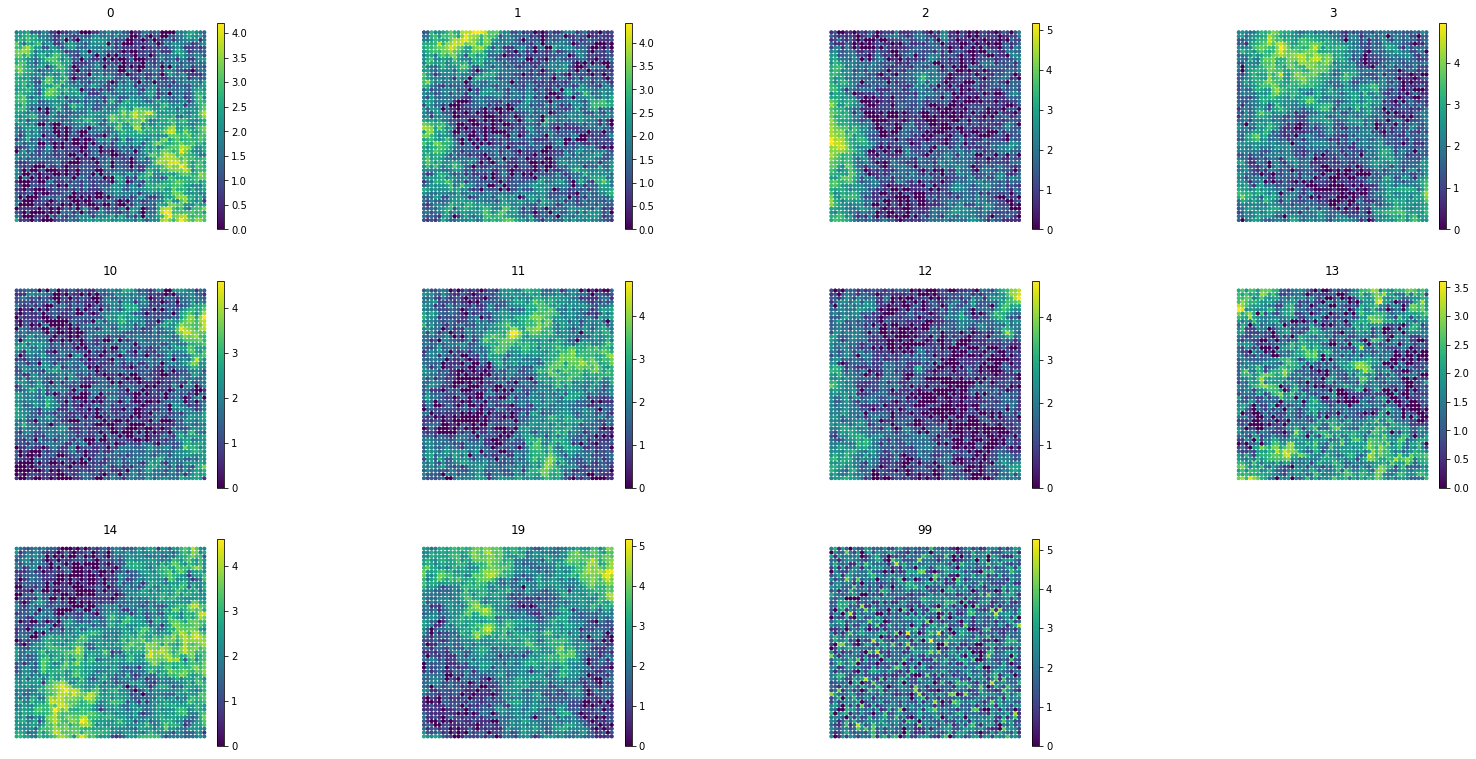

In [281]:
sq.pl.spatial_scatter(adata, shape=None, color = ["0", "1", "2", "3", "10", "11", "12", "13", "14", "19", "99"], size=30, frameon=False)